In [31]:
import pandas as pd
import numpy as np
import re

In [32]:
df1 = pd.read_csv('/Users/collinswestnedge/programming/Metis_Online/project_02/neighborhoods_/salt_lake_raw.csv')
df2 = pd.read_csv('/Users/collinswestnedge/programming/Metis_Online/project_02/neighborhoods_/park_city_raw.csv')

df = pd.concat([df1, df2]).drop(columns=['Unnamed: 0']).reset_index()
df.groupby('URL').size().value_counts()

1    902
2      4
dtype: int64

In [33]:
# df1 = pd.read_csv('/Users/collinswestnedge/programming/Metis_Online/project_02/neighborhoods_/chicago_il.csv')
# df2 = pd.read_csv('/Users/collinswestnedge/programming/Metis_Online/project_02/neighborhoods_/evanston_il.csv')
# df3 = pd.read_csv('/Users/collinswestnedge/programming/Metis_Online/project_02/neighborhoods_/glenview_il.csv')
# df4 = pd.read_csv('/Users/collinswestnedge/programming/Metis_Online/project_02/neighborhoods_/naperville_il.csv')
# df5 = pd.read_csv('/Users/collinswestnedge/programming/Metis_Online/project_02/neighborhoods_/oak_park_il.csv')
# df6 = pd.read_csv('/Users/collinswestnedge/programming/Metis_Online/project_02/neighborhoods_/skokie_il.csv')
# df7 = pd.read_csv('/Users/collinswestnedge/programming/Metis_Online/project_02/neighborhoods_/cicero_il.csv')
# df8 = pd.read_csv('/Users/collinswestnedge/programming/Metis_Online/project_02/neighborhoods_/oak_lawn_il.csv')

In [27]:
# df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8]).drop(columns=['Unnamed: 0']).reset_index()
# df.groupby('URL').size().value_counts()

In [34]:
df

,index,Type,Year built,Heating,Cooling,Parking,Lot,Price/sqft,Total Price,Address,Square Feet,New construction,Bedrooms,Bathrooms,Full bathrooms,neighborhood_stats,URL,Half bathrooms,HOA
0,0,Single Family,2011,Other,Central,2 spaces,"5,227 sqft",$196,"$598,900","513 W Aspen Peak Dr, South Jordan, UT 84095","3,062",No,4.0,3.0,3.0,Home values in 84095 have risen 3.3 % (↑) over...,https://www.zillow.com/homedetails/513-W-Aspen...,NaN,NaN
1,1,Single Family,1997,"Forced air, Gas",Central,No Data,"6,534 sqft",$166,"$476,500","485 E Henry Day Ct, Draper, UT 84020","2,873",No,5.0,NaN,NaN,NaN,https://www.zillow.com/homedetails/485-E-Henry...,NaN,NaN
2,2,Townhouse,No Data,No Data,No Data,2 spaces,"1,742 sqft",$266,"$864,900","250 S Main St #25, Alpine, UT 84004","3,248",Yes,3.0,3.0,2.0,NaN,https://www.zillow.com/homedetails/250-S-Main-...,1.0,NaN
3,3,Townhouse,No Data,No Data,No Data,2 spaces,"1,742 sqft",$251,"$814,900","250 S Main St #1, Alpine, UT 84004","3,248",Yes,3.0,3.0,2.0,NaN,https://www.zillow.com/homedetails/250-S-Main-...,1.0,NaN
4,4,Townhouse,No Data,No Data,No Data,2 spaces,"1,742 sqft",$205,"$999,900","250 S Main St #24, Alpine, UT 84004","4,889",Yes,3.0,4.0,3.0,NaN,https://www.zillow.com/homedetails/250-S-Main-...,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,345,Single Family,No Data,No Data,No Data,2 spaces,"6,534 sqft",$259,"$831,198","6810 Woods Rose Dr #76, Park City, UT 84098","3,213",Yes,3.0,3.0,2.0,NaN,https://www.zillow.com/homedetails/6810-Woods-...,1.0,NaN
906,346,Single Family,No Data,No Data,No Data,2 spaces,"6,534 sqft",$236,"$749,650","6800 Sumac Cir, Park City, UT 84098","3,175",Yes,3.0,3.0,2.0,NaN,https://www.zillow.com/homedetails/6800-Sumac-...,1.0,NaN
907,347,Single Family,No Data,No Data,No Data,2 spaces,"6,098 sqft",$249,"$734,750","1397 Sumac Cir, Park City, UT 84098","2,953",Yes,3.0,3.0,2.0,NaN,https://www.zillow.com/homedetails/1397-Sumac-...,1.0,NaN
908,348,Single Family,1997,No Data,No Data,No Data,"10,018 sqft",$541,"$1,365,000","1361 W Settlement Dr, Park City, UT 84098","2,523",No,3.0,3.0,2.0,NaN,https://www.zillow.com/homedetails/1361-W-Sett...,1.0,NaN


In [35]:
df.groupby('Address').size().value_counts()

1    900
2      5
dtype: int64

In [36]:
# there are a few duplicate urls so we will drop those
df.drop_duplicates(subset=['URL'], inplace=True)

In [37]:
df.replace(to_replace=['None', 'No Data'], value=np.nan, inplace=True)

In [38]:
df.isna().sum()

index                   0
Type                   71
Year built            115
Heating               471
Cooling               620
Parking               246
Lot                   414
Price/sqft             71
Total Price             0
Address                 0
Square Feet           175
New construction        0
Bedrooms                1
Bathrooms              17
Full bathrooms         93
neighborhood_stats    411
URL                     0
Half bathrooms        463
HOA                   719
dtype: int64

In [39]:
def acres_to_sqft(x):
    if isinstance(x, list):
        if 'acres' in x:
            sqft = float(x[0].replace(',','')) * 43560
            return round(sqft, 2)
        else:
            return float(x[0].replace(',',''))
    else:
        return x
    
    
def sqft_to_int(x):
    if isinstance(x, str):
        if x != '--':
            x_formatted = re.sub("[^0-9]", "", x)
            return int(x_formatted)
        else:
            return np.nan
    else:
        return x
    
    
def group_cooling(x):
    a = 'Central, Geothermal, Other'
    b = 'Geothermal'
    c = 'Central, Refrigeration'
    d = 'Geothermal, Other'
    if x == a:
        return 'Other'
    elif x == b:
        return 'Other'
    elif x == c:
        return 'Other'
    elif x == d:
        return 'Other'
    else:
        return x

# get the historic median neighborhood price for property
def get_median_value(x):
    if isinstance(x, str):
        median = x.split('.')[-2]
        median2 = median.split(' is ')
        char = median2[0][0:10]
        val =  median2[-1]
        val_formatted = int(re.sub('[^0-9]', '', val))
        return val_formatted
    else:
        return x
    
def get_zip(x):
    test = x.split(',')
    city_zip = test[-1].split(' ')
    return city_zip[-1]


# df['zip'] = df.Address.apply(get_zip)


df['Total Price'] = df['Total Price'].apply(lambda x: float(re.sub("[^0-9]", "", x)) if isinstance(x, str) else x)
df['zip'] = df.Address.apply(get_zip)
df['Square Feet'] = df['Square Feet'].apply(sqft_to_int)
df['HOA'] = df['HOA'].apply(lambda x: float(re.sub("[^0-9]", "", x)) if isinstance(x, str) else x)
df['HOA'] = df['HOA'].apply(lambda x: 'Yes' if np.isnan(x) else 'No')
df['Bedrooms'] = df['Bedrooms'].apply(lambda x: float(re.sub("[^0-9]", "", x)) if isinstance(x, str) else x)
df['Bathrooms'] = df['Bathrooms'].apply(lambda x: float(re.sub("[^0-9]", "", x)) if isinstance(x, str) else x)
df['Full bathrooms'] = df['Full bathrooms'].apply(lambda x: int(x) if isinstance(x, str) else x)
df['Half bathrooms'].fillna(0, inplace=True)
df['Half bathrooms'] = df['Half bathrooms'].astype(int)
df['Year built'] = df['Year built'].apply(lambda x: int(x) if isinstance(x, str) else x)
df['Cooling'] = df.Cooling.replace('Refrigerator', 'Refrigeration')
df.Cooling.fillna('None', inplace=True)
df['Lot'] = df['Lot'].apply(lambda x: x.lower() if isinstance(x, str) else x)
df['Lot Temp'] = df['Lot'].str.split(' ')
df['Lot'] = df['Lot Temp'].apply(acres_to_sqft)
df['Cooling'] = df.Cooling.apply(group_cooling)
df['median_nhv'] = df.neighborhood_stats.apply(get_median_value)
# df['median_nhv'] = df.groupby(['zip', 'Type'])['Total Price'].transform('median')

#imputing missing year built values with median for that zip code
year_built_dict = dict(df.groupby('zip')['Year built'].median())
df['Year built'] = df['Year built'].fillna(df.zip.map(year_built_dict))
df['Bathrooms'].fillna(df.Bathrooms.median(), inplace=True)
df['Full bathrooms'].fillna(0, inplace=True)

# df.drop(columns=['Lot Temp', 'Price/sqft', 'index', 'Status'], inplace=True)
df.drop(columns=['Lot Temp', 'Price/sqft', 'index'], inplace=True)

    

In [40]:
for item in df.columns.to_list():
    print(item + ':')
    print(df[item].value_counts())
    print()

Type:
Single Family            463
Condo                    195
Townhouse                148
Multiple Occupancy        22
Mobile / Manufactured      7
Name: Type, dtype: int64

Year built:
2020.0    202
2007.0     61
2004.0     36
2018.0     33
2009.0     28
         ... 
1895.0      1
1909.0      1
1974.0      1
1956.0      1
1945.0      1
Name: Year built, Length: 97, dtype: int64

Heating:
Forced air, Gas                        144
Other                                  116
Forced air                              53
Gas                                     13
Forced air, Radiant, Gas                11
Other, Gas                              11
None, Other                             10
Forced air, Radiant                      7
Radiant                                  7
Radiant, Gas                             6
Forced air, Electric                     6
Forced air, Other, Gas                   5
Baseboard, Electric                      4
Heat pump, Gas                           3
No

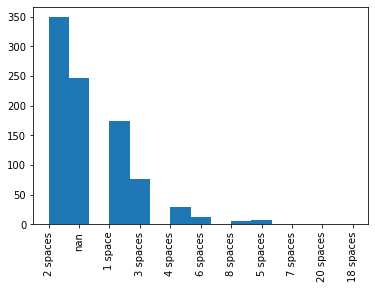

In [41]:
import matplotlib.pyplot as plt
plt.hist(df.Parking, bins=15);
plt.xticks(rotation=90);

In [42]:
df.Parking.isna().sum()

246

In [12]:
df.drop(columns=['Lot'], inplace=True)

In [43]:
df['Parking_Binned'] = df.Parking.apply(lambda x: 'Yes' if isinstance(x, str) else 'No')

In [44]:
df

,Type,Year built,Heating,Cooling,Parking,Lot,Total Price,Address,Square Feet,New construction,Bedrooms,Bathrooms,Full bathrooms,neighborhood_stats,URL,Half bathrooms,HOA,zip,median_nhv,Parking_Binned
0,Single Family,2011.0,Other,Central,2 spaces,5227.0,598900.0,"513 W Aspen Peak Dr, South Jordan, UT 84095",3062.0,No,4.0,3.0,3.0,Home values in 84095 have risen 3.3 % (↑) over...,https://www.zillow.com/homedetails/513-W-Aspen...,0,Yes,84095,520177.0,Yes
1,Single Family,1997.0,"Forced air, Gas",Central,NaN,6534.0,476500.0,"485 E Henry Day Ct, Draper, UT 84020",2873.0,No,5.0,3.0,0.0,NaN,https://www.zillow.com/homedetails/485-E-Henry...,0,Yes,84020,NaN,No
2,Townhouse,2000.0,NaN,None,2 spaces,1742.0,864900.0,"250 S Main St #25, Alpine, UT 84004",3248.0,Yes,3.0,3.0,2.0,NaN,https://www.zillow.com/homedetails/250-S-Main-...,1,Yes,84004,NaN,Yes
3,Townhouse,2000.0,NaN,None,2 spaces,1742.0,814900.0,"250 S Main St #1, Alpine, UT 84004",3248.0,Yes,3.0,3.0,2.0,NaN,https://www.zillow.com/homedetails/250-S-Main-...,1,Yes,84004,NaN,Yes
4,Townhouse,2000.0,NaN,None,2 spaces,1742.0,999900.0,"250 S Main St #24, Alpine, UT 84004",4889.0,Yes,3.0,4.0,3.0,NaN,https://www.zillow.com/homedetails/250-S-Main-...,1,Yes,84004,NaN,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,Single Family,2007.0,NaN,None,2 spaces,6534.0,831198.0,"6810 Woods Rose Dr #76, Park City, UT 84098",3213.0,Yes,3.0,3.0,2.0,NaN,https://www.zillow.com/homedetails/6810-Woods-...,1,Yes,84098,NaN,Yes
906,Single Family,2007.0,NaN,None,2 spaces,6534.0,749650.0,"6800 Sumac Cir, Park City, UT 84098",3175.0,Yes,3.0,3.0,2.0,NaN,https://www.zillow.com/homedetails/6800-Sumac-...,1,Yes,84098,NaN,Yes
907,Single Family,2007.0,NaN,None,2 spaces,6098.0,734750.0,"1397 Sumac Cir, Park City, UT 84098",2953.0,Yes,3.0,3.0,2.0,NaN,https://www.zillow.com/homedetails/1397-Sumac-...,1,Yes,84098,NaN,Yes
908,Single Family,1997.0,NaN,None,NaN,10018.0,1365000.0,"1361 W Settlement Dr, Park City, UT 84098",2523.0,No,3.0,3.0,2.0,NaN,https://www.zillow.com/homedetails/1361-W-Sett...,1,Yes,84098,NaN,No


In [45]:
df.Type.value_counts()

Single Family            463
Condo                    195
Townhouse                148
Multiple Occupancy        22
Mobile / Manufactured      7
Name: Type, dtype: int64

In [46]:
df.isna().sum()

Type                   71
Year built              0
Heating               471
Cooling                 0
Parking               246
Lot                   414
Total Price             0
Address                 0
Square Feet           175
New construction        0
Bedrooms                1
Bathrooms               0
Full bathrooms          0
neighborhood_stats    411
URL                     0
Half bathrooms          0
HOA                     0
zip                     0
median_nhv            411
Parking_Binned          0
dtype: int64

In [47]:
# df['Bathrooms_adj'] = abs(df['Bathrooms'] - df['Full bathrooms'])
df['Bedrooms'].fillna(df.Bedrooms.median(), inplace=True)

In [48]:
df_final = df[(df['Type'] != 'Miscellaneous') & (df['Type'] != 'Apartment') & (df.zip != '43147')].copy()

(array([519., 151.,  36.,  17.,   4.,   2.,   1.,   0.,   0.,   1.]),
 array([  250. ,  3009.8,  5769.6,  8529.4, 11289.2, 14049. , 16808.8,
        19568.6, 22328.4, 25088.2, 27848. ]),
 <BarContainer object of 10 artists>)

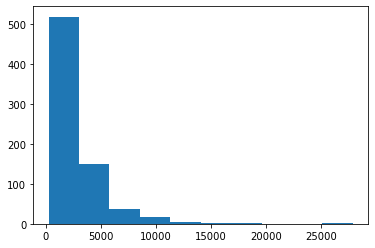

In [49]:
plt.hist(df_final['Square Feet'])

In [50]:
df_final.isna().sum()

Type                   71
Year built              0
Heating               471
Cooling                 0
Parking               246
Lot                   414
Total Price             0
Address                 0
Square Feet           175
New construction        0
Bedrooms                0
Bathrooms               0
Full bathrooms          0
neighborhood_stats    411
URL                     0
Half bathrooms          0
HOA                     0
zip                     0
median_nhv            411
Parking_Binned          0
dtype: int64

In [20]:
df_final.drop(columns=['Parking'])

,Type,Year built,Heating,Cooling,HOA,Total Price,Address,Square Feet,New construction,Bedrooms,Bathrooms,Full bathrooms,neighborhood_stats,URL,Half bathrooms,zip,median_nhv2,Parking_Binned,Bathrooms_adj
0,Condo,1910.0,Gas,Central,No,249900.0,"5329 S Harper Ave #2, Chicago, IL 60615",1000.0,No,2.0,2.0,2.0,Home values in Hyde Park have risen 0.6 % (↑) ...,https://www.zillow.com/homedetails/5329-S-Harp...,0,60615,396553,No,0.0
1,Single Family,1957.0,Forced air,Central,Yes,399000.0,"7144 N Ozark Ave, Chicago, IL 60631",1224.0,No,2.0,2.0,2.0,Home values in Edison Park have risen 0.6 % (↑...,https://www.zillow.com/homedetails/7144-N-Ozar...,0,60631,356353,Yes,0.0
2,Condo,2007.0,Forced air,Central,No,169898.0,"1673 W Farwell Ave APT 1S, Chicago, IL 60626",775.0,No,2.0,1.0,1.0,Home values in Rogers Park have risen 0.6 % (↑...,https://www.zillow.com/homedetails/1673-W-Farw...,0,60626,226102,No,0.0
3,Condo,2008.0,Gas,Central,No,489900.0,"1400 S Michigan Ave APT 2203, Chicago, IL 60605",1273.0,No,2.0,2.0,2.0,Home values in South Loop have risen 0.6 % (↑)...,https://www.zillow.com/homedetails/1400-S-Mich...,0,60605,376901,Yes,0.0
4,Single Family,1971.0,Forced air,Central,Yes,389000.0,"10606 S Leavitt St, Chicago, IL 60643",2179.0,No,3.0,3.0,2.0,Home values in Beverly have risen 0.6 % (↑) ov...,https://www.zillow.com/homedetails/10606-S-Lea...,1,60643,346385,Yes,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2605,Condo,2005.0,Forced air,Central,No,168999.0,"9440 S 51st Ave APT 502, Oak Lawn, IL 60453",1052.0,No,1.0,1.0,1.0,Home values in 60453 have risen 1.3 % (↑) over...,https://www.zillow.com/homedetails/9440-S-51st...,0,60453,210544,Yes,0.0
2606,Single Family,1973.0,Gas,Central,Yes,399900.0,"9246 S Keeler Ave, Oak Lawn, IL 60453",3400.0,No,4.0,3.0,3.0,Home values in 60453 have risen 1.3 % (↑) over...,https://www.zillow.com/homedetails/9246-S-Keel...,0,60453,210544,Yes,0.0
2607,Condo,1973.0,Other,Refrigeration,No,94500.0,"4929 W 87th St APT 3NW, Oak Lawn, IL 60453",852.0,No,2.0,1.0,1.0,Home values in 60453 have risen 1.3 % (↑) over...,https://www.zillow.com/homedetails/4929-W-87th...,0,60453,210544,Yes,0.0
2608,Single Family,1949.0,"Forced air, Gas",Central,Yes,249900.0,"9117 S 53rd Ct, Oak Lawn, IL 60453",1343.0,No,3.0,2.0,1.0,Home values in 60453 have risen 1.3 % (↑) over...,https://www.zillow.com/homedetails/9117-S-53rd...,1,60453,210544,Yes,1.0


In [51]:
df_final.Type.value_counts()

Single Family            463
Condo                    195
Townhouse                148
Multiple Occupancy        22
Mobile / Manufactured      7
Name: Type, dtype: int64

In [55]:
df_final.isna().sum()

Type                   71
Year built              0
Heating               471
Cooling                 0
Parking               246
Lot                   414
Total Price             0
Address                 0
Square Feet           175
New construction        0
Bedrooms                0
Bathrooms               0
Full bathrooms          0
neighborhood_stats    411
URL                     0
Half bathrooms          0
HOA                     0
zip                     0
median_nhv            411
Parking_Binned          0
address_clean           0
dtype: int64

In [101]:
df_final[df_final['zip'] == '43147']

,Type,Year built,Heating,Cooling,Parking,Lot,Total Price,Address,Square Feet,New construction,Bedrooms,Bathrooms,Full bathrooms,Half bathrooms,neighborhood_stats,URL,HOA,zip,median_nhv,Parking_Binned


In [53]:
def clean_address(x):
    if 'UNIT' in x:
        temp = x.split(' UNIT')
        street_num = temp[0]
        temp2 = temp[1].split(', ')
        city_zip = temp2[1::]
        formatted_address = ' '.join([street_num] + city_zip)
        return formatted_address
    elif 'APT' in x:
        temp = x.split(' APT')
        street_num = temp[0]
        temp2 = temp[1].split(', ')
        city_zip = temp2[1::]
        formatted_address = ' '.join([street_num] + city_zip)
        return formatted_address
    elif '#' in x:
        temp = x.split(' #')
        street_num = temp[0]
        temp2 = temp[1].split(', ')
        city_zip = temp2[1::]
        formatted_address = ' '.join([street_num] + city_zip)
        return formatted_address
    elif 'PENTHOUSE' in x:
        temp = x.split(' PENTHOUSE')
        street_num = temp[0]
        temp2 = temp[1].split(', ')
        city_zip = temp2[1::]
        formatted_address = ' '.join([street_num] + city_zip)
        return formatted_address
    elif 'SUITE' in x:
        temp = x.split(' SUITE')
        street_num = temp[0]
        temp2 = temp[1].split(', ')
        city_zip = temp2[1::]
        formatted_address = ' '.join([street_num] + city_zip)
        return formatted_address
    # just return zip code for weird addresses like these so we can still have gps
    # for these properties
#     elif '(Undisclosed Address)' in x:
#         return x.split(' ')[-1]
#     elif 'Floor plan' in x:
#         return x.split(' ')[-1]
#     elif 'Buildable plan' in x:
#         return x.split(' ')[-1]
    else:
        return x

In [54]:
df_final['address_clean'] = df_final.Address.apply(clean_address)

In [104]:
from geopy.geocoders import Nominatim
# geolocator = Nominatim(user_agent="geopy/2.0.0")
# location = geolocator.geocode("910 west lake street, chicago il, 60607")

def get_coordinates(x):
    geolocator = Nominatim(user_agent="geopy/2.0.0")
    try:
        location_details = geolocator.geocode(x)
        lat_long = location_details[-1]
#        utah -114.052962	36.997968	-109.041058	42.001567
#        illinois -91.513079	36.970298	-87.494756	42.508481
        in_chicago = (40 <= lat_long[0] <= 42) and (-91.5 <= lat_long[1] <= -87)
        if in_chicago:
            print(lat_long)
            return list(lat_long)
        else:
            print(x)
            return np.nan
    except:
        return np.nan

# going to have to remove apartment numbers before you can do get geo location... 
# df_final['lat-lng'] = df_final.address_clean.apply(get_coordinates)


In [105]:
df_final['lat-lng'] = df_final.address_clean.apply(get_coordinates)

(40.7222041, -111.871131)
(40.729952, -111.89170293772756)
(40.7562973, -111.8839409)
(40.75507205263158, -111.87867078947369)
(40.7628046, -111.9182494)
(40.80652686567639, -111.93815469841506)
(40.76561795, -111.8571026678849)
(40.774603813564724, -111.89082927391725)
(40.79388711040748, -111.8942023992639)
(40.75455766666666, -111.875447)
(40.788142378639066, -111.932344)
(40.746359069798984, -111.88213883327714)
(40.747672934810716, -111.86097471312146)
(40.741858, -111.86657341037969)
(40.757892346938775, -111.865223)
(40.796091867771544, -111.93532852312882)
(40.7628046, -111.9182494)
(40.736203700000004, -111.85989600566133)
(40.75009932653061, -111.914067)
(40.741436, -111.87934278582512)
(40.783381272727276, -111.913874)
(40.75703075, -111.85716604999999)
(40.763916, -111.90102336734694)
(40.77527382433654, -111.89319297957196)
(40.77500590798669, -111.8931469465745)
(40.78447763157895, -111.90025494736841)
(40.71669645, -111.84237945006173)
(40.769362, -111.8655872)
(40.75753

(40.638219, -111.477771)
(40.6622804, -111.497431)
(40.637086966690305, -111.49376082467072)
(40.664016681802735, -111.49355523393247)
(40.6436474, -111.495159)
(40.6399185, -111.49420144999999)
(40.653258737930095, -111.50734432269599)
(40.6451202, -111.4892301)
(40.6621709, -111.5136376)
(40.6441277547409, -111.49153707674618)
(40.64174440576659, -111.49621118468096)
(40.623032, -111.489677)
(40.647640337201636, -111.50153194235612)
(40.6233644, -111.491165)
(40.6436022, -111.4843898)
(40.62256432395316, -111.49120018965372)
(40.654662241036405, -111.51071862021075)
(40.664016681802735, -111.49355523393247)
(40.664101313733866, -111.49289133588016)
(40.6569933, -111.5054782)
(40.64044078690948, -111.49642952325803)
(40.6528455019404, -111.50478952089753)
(40.64946400094238, -111.50438056119785)
(40.65570102855465, -111.51163724305705)
(40.6428041, -111.4953561)
(40.626083489284404, -111.48011478760019)
(40.6622804, -111.497431)
(40.64946400094238, -111.50438056119785)
(40.65326424610

In [106]:
# df_final.to_csv('/Users/collinswestnedge/programming/Metis_Online/project_02/clean_data/all_neighborhoods_clean_lat_long.csv')

df_final.to_csv('/Users/collinswestnedge/programming/Metis_Online/project_02/clean_data/pc_slc_clean.csv')



In [107]:
df_final['lat-lng'].isna().sum()

314

In [109]:
df_final

,Type,Year built,Heating,Cooling,Parking,Lot,Total Price,Address,Square Feet,New construction,...,Full bathrooms,Half bathrooms,neighborhood_stats,URL,HOA,zip,median_nhv,Parking_Binned,address_clean,lat-lng
0,Townhouse,2020.0,Gas,None,2 spaces,435.0,535000.0,"2599 S 700 E, Salt Lake City, UT 84106",1817.0,No,...,2.0,1,Home values in Sugar House have risen 5.3 % (↑...,https://www.zillow.com/homedetails/2599-S-700-...,Yes,84106,468204.0,Yes,"2599 S 700 E, Salt Lake City, UT 84106","[40.7222041, -111.871131]"
1,Single Family,1924.0,NaN,None,3 spaces,4791.0,325000.0,"20 W Layton Ave, Salt Lake City, UT 84115",1599.0,No,...,1.0,0,Home values in 84115 have risen 5.3 % (↑) over...,https://www.zillow.com/homedetails/20-W-Layton...,Yes,84115,324148.0,Yes,"20 W Layton Ave, Salt Lake City, UT 84115","[40.729952, -111.89170293772756]"
2,Single Family,1907.0,Forced air,Central,NaN,4791.0,375000.0,"415 E 600 S, Salt Lake City, UT 84111",1136.0,No,...,1.0,0,Home values in Salt Lake City have risen 4.7 %...,https://www.zillow.com/homedetails/415-E-600-S...,Yes,84111,419987.0,No,"415 E 600 S, Salt Lake City, UT 84111","[40.7562973, -111.8839409]"
3,Multiple Occupancy,1899.0,Other,Central,NaN,NaN,368000.0,"427 E Sego Ave, Salt Lake City, UT 84111",1340.0,No,...,0.0,0,Home values in Salt Lake City have risen 4.7 %...,https://www.zillow.com/homedetails/427-E-Sego-...,Yes,84111,419987.0,No,"427 E Sego Ave, Salt Lake City, UT 84111","[40.75507205263158, -111.87867078947369]"
4,Condo,1983.0,NaN,None,1 space,NaN,375000.0,"48 W 300 S APT 406N, Salt Lake City, UT 84101",1509.0,No,...,2.0,0,Home values in Downtown Salt Lake City have ri...,https://www.zillow.com/homedetails/48-W-300-S-...,No,84101,409706.0,Yes,48 W 300 S Salt Lake City UT 84101,"[40.7628046, -111.9182494]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,Single Family,2007.0,NaN,None,2 spaces,6534.0,831198.0,"6810 Woods Rose Dr #76, Park City, UT 84098",3213.0,Yes,...,2.0,1,NaN,https://www.zillow.com/homedetails/6810-Woods-...,Yes,84098,NaN,Yes,6810 Woods Rose Dr Park City UT 84098,NaN
578,Single Family,2007.0,NaN,None,2 spaces,6534.0,749650.0,"6800 Sumac Cir, Park City, UT 84098",3175.0,Yes,...,2.0,1,NaN,https://www.zillow.com/homedetails/6800-Sumac-...,Yes,84098,NaN,Yes,"6800 Sumac Cir, Park City, UT 84098",NaN
579,Single Family,2007.0,NaN,None,2 spaces,6098.0,734750.0,"1397 Sumac Cir, Park City, UT 84098",2953.0,Yes,...,2.0,1,NaN,https://www.zillow.com/homedetails/1397-Sumac-...,Yes,84098,NaN,Yes,"1397 Sumac Cir, Park City, UT 84098",NaN
580,Single Family,1997.0,NaN,None,NaN,10018.0,1365000.0,"1361 W Settlement Dr, Park City, UT 84098",2523.0,No,...,2.0,1,NaN,https://www.zillow.com/homedetails/1361-W-Sett...,Yes,84098,NaN,No,"1361 W Settlement Dr, Park City, UT 84098",NaN


In [110]:
df_final[df_final['lat-lng'].isna()]

,Type,Year built,Heating,Cooling,Parking,Lot,Total Price,Address,Square Feet,New construction,...,Full bathrooms,Half bathrooms,neighborhood_stats,URL,HOA,zip,median_nhv,Parking_Binned,address_clean,lat-lng
10,Single Family,1924.0,Forced air,None,NaN,3484.0,385000.0,"381 E Westminster Ave, South Salt Lake, UT 84115",1155.0,No,...,1.0,0,Home values in Liberty Wells have risen 5.3 % ...,https://www.zillow.com/homedetails/381-E-Westm...,Yes,84115,382242.0,No,"381 E Westminster Ave, South Salt Lake, UT 84115",NaN
11,Single Family,1941.0,"Forced air, Gas",None,NaN,7405.0,375000.0,"450 N Chicago St W, Salt Lake City, UT 84116",1575.0,No,...,2.0,0,Home values in Fairpark have risen 5.3 % (↑) o...,https://www.zillow.com/homedetails/450-N-Chica...,Yes,84116,296684.0,No,"450 N Chicago St W, Salt Lake City, UT 84116",NaN
15,Single Family,1900.0,Other,None,2 spaces,34412.4,649900.0,"233 N Chicago St, Salt Lake City, UT 84116",1224.0,No,...,2.0,0,Home values in Fairpark have risen 5.3 % (↑) o...,https://www.zillow.com/homedetails/233-N-Chica...,Yes,84116,296684.0,Yes,"233 N Chicago St, Salt Lake City, UT 84116",NaN
16,Single Family,1909.0,NaN,None,2 spaces,4791.0,899000.0,"379 N G St E, Salt Lake City, UT 84103",3201.0,No,...,3.0,0,Home values in Greater Avenues have risen 5.3 ...,https://www.zillow.com/homedetails/379-N-G-St-...,Yes,84103,594926.0,Yes,"379 N G St E, Salt Lake City, UT 84103",NaN
21,Townhouse,2011.0,"Forced air, Gas",None,NaN,871.0,549000.0,"676 E Markea Ave S #4, Salt Lake City, UT 84102",2052.0,No,...,3.0,1,Home values in 84102 have risen 5.3 % (↑) over...,https://www.zillow.com/homedetails/676-E-Marke...,Yes,84102,427693.0,No,676 E Markea Ave S Salt Lake City UT 84102,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,Single Family,2019.0,"Radiant, Electric, Gas",Central,NaN,261360.0,12500000.0,"175 White Pine Canyon Rd, Park City, UT 84060",10783.0,No,...,6.0,2,NaN,https://www.zillow.com/homedetails/175-White-P...,Yes,84060,NaN,No,"175 White Pine Canyon Rd, Park City, UT 84060",NaN
577,Single Family,2007.0,NaN,None,2 spaces,6534.0,831198.0,"6810 Woods Rose Dr #76, Park City, UT 84098",3213.0,Yes,...,2.0,1,NaN,https://www.zillow.com/homedetails/6810-Woods-...,Yes,84098,NaN,Yes,6810 Woods Rose Dr Park City UT 84098,NaN
578,Single Family,2007.0,NaN,None,2 spaces,6534.0,749650.0,"6800 Sumac Cir, Park City, UT 84098",3175.0,Yes,...,2.0,1,NaN,https://www.zillow.com/homedetails/6800-Sumac-...,Yes,84098,NaN,Yes,"6800 Sumac Cir, Park City, UT 84098",NaN
579,Single Family,2007.0,NaN,None,2 spaces,6098.0,734750.0,"1397 Sumac Cir, Park City, UT 84098",2953.0,Yes,...,2.0,1,NaN,https://www.zillow.com/homedetails/1397-Sumac-...,Yes,84098,NaN,Yes,"1397 Sumac Cir, Park City, UT 84098",NaN


In [31]:
def get_zip_coordinates(x):
    geolocator = Nominatim(user_agent="geopy/2.0.0")
    try:
        location = geolocator.geocode(x)
        if location != None:
            print(list(location[-1]))
            return list(location[-1])
        else:
            print(x)
            return np.nan
    except:
        return np.nan

In [32]:
# fill na lat-lng values with lat-lng of zip code
mask = df_final['lat-lng'].isna()
df_final.loc[mask, 'lat-lng'] = df_final.loc[mask, 'zip'].apply(get_zip_coordinates)

[41.890555, -87.687272]
[41.88597326003072, -87.62426231903511]
[41.87853401167714, -87.71772033986943]
[41.8883951, -87.652206]
[41.9919226, -87.7306736]
[41.921587813737915, -87.80111102725934]
[41.8883951, -87.652206]
[41.8883951, -87.652206]
[41.8883951, -87.652206]
[41.7978199, -87.5826917]
[41.88597326003072, -87.62426231903511]
[41.88597326003072, -87.62426231903511]
[41.69968359393504, -87.62341086697612]
[41.923732, -87.64271]
[41.9984912, -87.6601622]
[41.8883951, -87.652206]
[41.69968359393504, -87.62341086697612]
[41.89142078489098, -87.63288119348232]
[41.9189107573899, -87.69911509633843]
[41.87853401167714, -87.71772033986943]
[41.7978199, -87.5826917]
[41.98643541859497, -87.70616768688917]
[41.923732, -87.64271]
[41.923732, -87.64271]
[41.8883951, -87.652206]
[41.9610605781569, -87.69870404767025]
[41.88597326003072, -87.62426231903511]
[41.943891509558334, -87.79323459610701]
[41.89142078489098, -87.63288119348232]
[41.9610605781569, -87.69870404767025]
[41.6973937361

[41.6940046, -88.18558305957504]
[41.6940046, -88.18558305957504]
[41.6940046, -88.18558305957504]
[41.6940046, -88.18558305957504]
[41.8063783, -88.116084]
[41.6940046, -88.18558305957504]
[41.6940046, -88.18558305957504]
[41.8063783, -88.116084]
[41.6940046, -88.18558305957504]
[49.207429380697235, 2.206539303172687]
[41.8063783, -88.116084]
[41.87314146586051, -87.78710958926249]
[41.898633983554525, -87.7723932119167]
[41.898633983554525, -87.7723932119167]
[41.898633983554525, -87.7723932119167]
[41.87314146586051, -87.78710958926249]
[41.898633983554525, -87.7723932119167]
[41.87314146586051, -87.78710958926249]
[41.898633983554525, -87.7723932119167]
[41.87314146586051, -87.78710958926249]
[41.87314146586051, -87.78710958926249]
[41.898633983554525, -87.7723932119167]
[41.87314146586051, -87.78710958926249]
[41.87314146586051, -87.78710958926249]
[41.898633983554525, -87.7723932119167]
[41.87314146586051, -87.78710958926249]
[41.87314146586051, -87.78710958926249]
[41.8986339835

In [33]:
df_final['lat-lng'].isna().sum()

0

In [111]:
df_temp = df_final['lat-lng'].apply(pd.Series)
df_temp.columns = ['lat', 'long']

complete_df = df_temp.join(df_final)
complete_df.drop(columns=['lat-lng'], inplace=True)

In [112]:
complete_df

,lat,long,Type,Year built,Heating,Cooling,Parking,Lot,Total Price,Address,...,Bathrooms,Full bathrooms,Half bathrooms,neighborhood_stats,URL,HOA,zip,median_nhv,Parking_Binned,address_clean
0,40.722204,-111.871131,Townhouse,2020.0,Gas,None,2 spaces,435.0,535000.0,"2599 S 700 E, Salt Lake City, UT 84106",...,3.0,2.0,1,Home values in Sugar House have risen 5.3 % (↑...,https://www.zillow.com/homedetails/2599-S-700-...,Yes,84106,468204.0,Yes,"2599 S 700 E, Salt Lake City, UT 84106"
1,40.729952,-111.891703,Single Family,1924.0,NaN,None,3 spaces,4791.0,325000.0,"20 W Layton Ave, Salt Lake City, UT 84115",...,1.0,1.0,0,Home values in 84115 have risen 5.3 % (↑) over...,https://www.zillow.com/homedetails/20-W-Layton...,Yes,84115,324148.0,Yes,"20 W Layton Ave, Salt Lake City, UT 84115"
2,40.756297,-111.883941,Single Family,1907.0,Forced air,Central,NaN,4791.0,375000.0,"415 E 600 S, Salt Lake City, UT 84111",...,1.0,1.0,0,Home values in Salt Lake City have risen 4.7 %...,https://www.zillow.com/homedetails/415-E-600-S...,Yes,84111,419987.0,No,"415 E 600 S, Salt Lake City, UT 84111"
3,40.755072,-111.878671,Multiple Occupancy,1899.0,Other,Central,NaN,NaN,368000.0,"427 E Sego Ave, Salt Lake City, UT 84111",...,2.0,0.0,0,Home values in Salt Lake City have risen 4.7 %...,https://www.zillow.com/homedetails/427-E-Sego-...,Yes,84111,419987.0,No,"427 E Sego Ave, Salt Lake City, UT 84111"
4,40.762805,-111.918249,Condo,1983.0,NaN,None,1 space,NaN,375000.0,"48 W 300 S APT 406N, Salt Lake City, UT 84101",...,2.0,2.0,0,Home values in Downtown Salt Lake City have ri...,https://www.zillow.com/homedetails/48-W-300-S-...,No,84101,409706.0,Yes,48 W 300 S Salt Lake City UT 84101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,NaN,NaN,Single Family,2007.0,NaN,None,2 spaces,6534.0,831198.0,"6810 Woods Rose Dr #76, Park City, UT 84098",...,3.0,2.0,1,NaN,https://www.zillow.com/homedetails/6810-Woods-...,Yes,84098,NaN,Yes,6810 Woods Rose Dr Park City UT 84098
578,NaN,NaN,Single Family,2007.0,NaN,None,2 spaces,6534.0,749650.0,"6800 Sumac Cir, Park City, UT 84098",...,3.0,2.0,1,NaN,https://www.zillow.com/homedetails/6800-Sumac-...,Yes,84098,NaN,Yes,"6800 Sumac Cir, Park City, UT 84098"
579,NaN,NaN,Single Family,2007.0,NaN,None,2 spaces,6098.0,734750.0,"1397 Sumac Cir, Park City, UT 84098",...,3.0,2.0,1,NaN,https://www.zillow.com/homedetails/1397-Sumac-...,Yes,84098,NaN,Yes,"1397 Sumac Cir, Park City, UT 84098"
580,NaN,NaN,Single Family,1997.0,NaN,None,NaN,10018.0,1365000.0,"1361 W Settlement Dr, Park City, UT 84098",...,3.0,2.0,1,NaN,https://www.zillow.com/homedetails/1361-W-Sett...,Yes,84098,NaN,No,"1361 W Settlement Dr, Park City, UT 84098"


In [113]:
complete_df.to_csv('/Users/collinswestnedge/programming/Metis_Online/project_02/clean_data/all_neighborhoods_clean.csv')



In [114]:
complete_df

,lat,long,Type,Year built,Heating,Cooling,Parking,Lot,Total Price,Address,...,Bathrooms,Full bathrooms,Half bathrooms,neighborhood_stats,URL,HOA,zip,median_nhv,Parking_Binned,address_clean
0,40.722204,-111.871131,Townhouse,2020.0,Gas,None,2 spaces,435.0,535000.0,"2599 S 700 E, Salt Lake City, UT 84106",...,3.0,2.0,1,Home values in Sugar House have risen 5.3 % (↑...,https://www.zillow.com/homedetails/2599-S-700-...,Yes,84106,468204.0,Yes,"2599 S 700 E, Salt Lake City, UT 84106"
1,40.729952,-111.891703,Single Family,1924.0,NaN,None,3 spaces,4791.0,325000.0,"20 W Layton Ave, Salt Lake City, UT 84115",...,1.0,1.0,0,Home values in 84115 have risen 5.3 % (↑) over...,https://www.zillow.com/homedetails/20-W-Layton...,Yes,84115,324148.0,Yes,"20 W Layton Ave, Salt Lake City, UT 84115"
2,40.756297,-111.883941,Single Family,1907.0,Forced air,Central,NaN,4791.0,375000.0,"415 E 600 S, Salt Lake City, UT 84111",...,1.0,1.0,0,Home values in Salt Lake City have risen 4.7 %...,https://www.zillow.com/homedetails/415-E-600-S...,Yes,84111,419987.0,No,"415 E 600 S, Salt Lake City, UT 84111"
3,40.755072,-111.878671,Multiple Occupancy,1899.0,Other,Central,NaN,NaN,368000.0,"427 E Sego Ave, Salt Lake City, UT 84111",...,2.0,0.0,0,Home values in Salt Lake City have risen 4.7 %...,https://www.zillow.com/homedetails/427-E-Sego-...,Yes,84111,419987.0,No,"427 E Sego Ave, Salt Lake City, UT 84111"
4,40.762805,-111.918249,Condo,1983.0,NaN,None,1 space,NaN,375000.0,"48 W 300 S APT 406N, Salt Lake City, UT 84101",...,2.0,2.0,0,Home values in Downtown Salt Lake City have ri...,https://www.zillow.com/homedetails/48-W-300-S-...,No,84101,409706.0,Yes,48 W 300 S Salt Lake City UT 84101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,NaN,NaN,Single Family,2007.0,NaN,None,2 spaces,6534.0,831198.0,"6810 Woods Rose Dr #76, Park City, UT 84098",...,3.0,2.0,1,NaN,https://www.zillow.com/homedetails/6810-Woods-...,Yes,84098,NaN,Yes,6810 Woods Rose Dr Park City UT 84098
578,NaN,NaN,Single Family,2007.0,NaN,None,2 spaces,6534.0,749650.0,"6800 Sumac Cir, Park City, UT 84098",...,3.0,2.0,1,NaN,https://www.zillow.com/homedetails/6800-Sumac-...,Yes,84098,NaN,Yes,"6800 Sumac Cir, Park City, UT 84098"
579,NaN,NaN,Single Family,2007.0,NaN,None,2 spaces,6098.0,734750.0,"1397 Sumac Cir, Park City, UT 84098",...,3.0,2.0,1,NaN,https://www.zillow.com/homedetails/1397-Sumac-...,Yes,84098,NaN,Yes,"1397 Sumac Cir, Park City, UT 84098"
580,NaN,NaN,Single Family,1997.0,NaN,None,NaN,10018.0,1365000.0,"1361 W Settlement Dr, Park City, UT 84098",...,3.0,2.0,1,NaN,https://www.zillow.com/homedetails/1361-W-Sett...,Yes,84098,NaN,No,"1361 W Settlement Dr, Park City, UT 84098"


In [137]:
# get_zip_coordinates('84098')

[48.64093459881977, 12.101646491115858]


[48.64093459881977, 12.101646491115858]